In [20]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati
from matplotlib.ticker import FixedLocator, FormatStrFormatter


In [22]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')
    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='assemble seq'),
        Patch(facecolor='blue', label='assemble parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')


    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_for)}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [23]:
def plot_speedup(data_list,title,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list] ##Mediana non media 
    speedup = np.zeros(len(n_threads))
    speedup2 = np.zeros(len(n_threads))


    for i in range(len(n_threads)):
        speedup[i] = data_median[1]/data_median[i+1] #data_median[0]/data_median[i+1] speedup rispetto seq
        
    ax.plot(n_threads,speedup,'o--')

    ax.legend(['speedup w.r.t. sequential'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(n_threads)
    ax.set_xticklabels(n_threads, rotation = 45)


    ax.set(xlabel = 'workers (thread)',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")

## ASSEMBLAGGIO COMPLETO

In [24]:
nodi = 1000 #500 250
n_threads = [1,2,4,8,16,32,64,96]
size_queue = 1024 #hardcome in codice ma qui non conta
kk = -1 # granularity

In [25]:
# Nodi per lato: 250
assemble_nodi_250_seq = [43209 ,43192 ,42995 ,42986 ,42967 ,43036 ,42968 ,43001 ,42995 ,43013 ,43034 ,43003 ,43008 ,43088 ,43057 ,43084 ,43021 ,42969 ,43013 ,43032 ,43049 ,42996 ,43015 ,43001 ,42925 ,42990 ,42983 ,42989 ,43022 ,42996 ,42999 ,43029 ,42993 ,42974 ,42979 ,42993 ,43010 ,42969 ,43008 ,42994 ,43005 ,42999 ,42972 ,43010 ,43018 ,43020 ,42945 ,42959 ,42947 ,43008]

# Nodi per lato: 500
assemble_nodi_500_seq = [181217 ,181377 ,181402 ,181447 ,181457 ,182172 ,182242 ,181435 ,181298 ,181487 ,181350 ,182242 ,182096 ,181465 ,181282 ,181470 ,181432 ,182521 ,182308 ,181467 ,181921 ,181472 ,181467 ,182205 ,182289 ,181397 ,181389 ,181388 ,181515 ,182175 ,182318 ,181347 ,181468 ,181444 ,181347 ,182296 ,182161 ,181451 ,181436 ,181595 ]

# Nodi per lato: 1000
assemble_nodi_1000_seq = [737432 ,737446 ,737062 ,740213 ,740289 ,737036 ,737616 ,737168 ,737224 ,740283 ,740423 ,736972 ,737223 ,737091 ,736947 ,740108 ,740380 ,737716 ,737338 ,737243]


In [26]:

# === Thread 1 ===
assemble_nodi_250_thread_1 = [33736,33829,34203,33802,33647,33646,33654,33843,33424,33597,33827,33792,33524,33619,33837,33831,33474,33652,33790,33641,33490,33740,33543,33478,33829,33849,33435,34258,33591,33750,33713,33463,33610,34342,33609,33790,33560,33538,33697,34102,33920,33862,33841,33502,33599,33884,33701,33469,33721,33914]
assemble_nodi_500_thread_1 = [147711,144677,147869,145324,147796,144514,148205,144637,149071,144993,148716,144150,148614,144501,147236,144209,148241,144452,148114,144596,148179,144844,148117,144058,148236,144325,148413,144879,148712,144113,148309,144746,148441,145047,148604,144441,148074,144672,147728,144736]
assemble_nodi_1000_thread_1 = [571572,578028,575965,577530,576037,573638,571460,580266,573289,578811,572555,573857,573416,578764,575631,577724,574520,574254,579750,577287]

# === Thread 2 ===
assemble_nodi_250_thread_2 = [20986 ,21097 ,21084 ,20884 ,21041 ,21090 ,21119 ,21119 ,21032 ,21160 ,21778 ,21038 ,21067 ,21092 ,21061 ,21735 ,21049 ,21013 ,20975 ,21000 ,21738 ,21294 ,21769 ,21239 ,21012 ,21003 ,20980 ,21684 ,20949 ,21941 ,21117 ,21814 ,21382 ,22079 ,20958 ,21676 ,20980 ,21231 ,21873 ,21289 ,20943 ,20951 ,20868 ,21003 ,21413 ,21098 ,21172 ,21179 ,21109 ,21342]
assemble_nodi_500_thread_2 = [93456 ,91023 ,97684 ,92855 ,93337 ,91319 ,97377 ,93001 ,97234 ,91375 ,95601 ,91582 ,93785 ,93404 ,93771 ,94555 ,93720 ,92879 ,93178 ,91156 ,93867 ,92742 ,93371 ,91278 ,93375 ,93107 ,92618 ,91066 ,93447 ,92754 ,93489 ,91464 ,95976 ,91144 ,93449 ,92752 ,93811 ,94921 ,95430 ,91732 ]
assemble_nodi_1000_thread_2 = [370956 ,383859 ,371136 ,370884 ,370740 ,386232 ,371509 ,370781 ,372276 ,370275 ,372746 ,370887 ,371935 ,372114 ,371794 ,369632 ,372782 ,369911 ,370987 ,381595 ]


# === Thread 4 ===
assemble_nodi_250_thread_4 = [15293,14840,15339,15367,15384,14754,16952,16829,15071,16574,16621,16451,15868,15780,15618,15169,16926,15469,15239,15035,14954,14964,14942,15334,15749,15617,15587,15803,15512,15680,15264,15633,15881,15463,15397,15239,15691,15521,15812,15635,15365,15594,15371,15645,15422,15548,15382,15795,15394,15639]
assemble_nodi_500_thread_4 = [66386,66020,69963,65983,71248,65808,72035,66199,71928,65544,66145,66505,66685,65844,66801,65879,72344,65611,67552,66416,66374,66397,65450,65876,65014,66639,65944,65861,66849,65743,71281,66099,71116,66276,65489,66525,65724,65937,65882,66913]
assemble_nodi_1000_thread_4 = [270667,266707,269643,268690,265750,268445,266428,274481,269287,265808,265176,268277,265059,267630,266205,267390,266147,265485,269353,268207]

# === Thread 8 ===
assemble_nodi_250_thread_8 = [13260,11922,11896,12160,11957,12028,12112,11873,12019,12604,11713,11598,11787,11709,11807,11931,11994,13124,15650,11796,12017,11810,11986,12000,11922,12041,12682,12513,12509,12011,12434,12251,12472,12406,12469,12502,11976,12653,12206,12319,12296,12558,12056,12277,12343,12103,12495,12474,12320,12152]
assemble_nodi_500_thread_8 = [52731,52881,52655,53195,56016,52719,53039,52376,53452,53575,53227,53094,58888,53149,56101,54027,53006,53596,53817,53043,53530,53228,53223,53830,56635,53070,53091,52150,53965,53503,53943,53653,52953,52803,53332,52874,54789,52621,62775,52860]
assemble_nodi_1000_thread_8 = [214770,220650,212972,213577,213567,240117,214490,220304,241411,214835,225901,213827,213831,215224,214037,213700,213916,213866,214860,213900]

# === Thread 16 ===
assemble_nodi_250_thread_16 = [11758,10633,12012,11797,11146,11891,11719,12068,12358,12089,12256,11714,11615,11655,11689,11643,12296,11743,12143,11857,10880,11711,12164,11627,12272,12334,10912,10339,10830,11684,11540,11632,11521,10518,11336,11698,11649,11670,12707,12011,12077,11891,12184,11953,12241,12089,19102,15719,12011,11548]
assemble_nodi_500_thread_16 = [55291,53283,56154,53955,55852,53157,56050,54144,55265,53547,55082,54483,56179,53214,55997,53238,55944,53631,55590,53699,56251,54893,55741,53434,55633,53875,55405,53322,55659,53778,55706,54579,55331,53801,55023,53018,49192,53957,55567,54964]
assemble_nodi_1000_thread_16 = [231179,197061,194982,196998,194768,196458,195047,196468,194288,195301,195075,195274,194061,196766,196579,195470,220169,220937,194507,219424]

# === Thread 32 ===
assemble_nodi_250_thread_32 = [19632,14584,13049,18377,18117,19024,17176,19133,17270,17872,17180,14821,21478,16969,12360,11585,13152,16488,13552,17217,12295,17431,17334,17720,17356,13032,18397,12882,17358,12390,12354,11805,11507,16789,17738,16526,11955,17594,16245,17502,12572,17014,14107,13419,11973,18061,11996,11542,12492,16539]
assemble_nodi_500_thread_32 = [55132,51963,53294,51664,53804,51388,53894,52233,54309,56105,56952,53437,53635,58711,52920,54622,53313,54518,51810,50970,56227,53175,54032,49373,57693,49631,52392,49571,54928,49841,59224,49166,55030,48602,52308,52447,53165,49910,54641,54393]
assemble_nodi_1000_thread_32 = [211606,190664,206898,196160,203445,203816,198950,193030,201326,199409,201781,188339,211791,204583,203826,205741,198581,191964,191463,211928]

# === Thread 64 ===
assemble_nodi_250_thread_64 = [23214,24791,14681,25415,20914,21685,18523,22987,24468,24271,23080,23793,21654,23996,23080,13033,14333,25995,23938,21493,14662,16263,22870,22591,12529,21608,21507,21331,23621,21318,23817,22850,15851,21567,23739,23665,14293,23882,22771,23650,13347,17699,24209,16178,23035,18201,18202,18885,12739,18324]
assemble_nodi_500_thread_64 = [52497,54365,54084,55943,58440,50993,57602,56138,55765,55722,57466,56812,48185,57974,51940,56200,55703,64211,57106,51592,58656,65517,58015,58425,58307,55256,54700,54859,54294,47811,58974,55432,62015,61282,51426,58617,52717,54599,53545,55864]
assemble_nodi_1000_thread_64 = [201672,211903,205853,204727,206522,200940,196813,208872,207020,201828,199081,206303,206457,200125,194566,192246,199465,210971,201329,198424]

# === Thread 96 ===
assemble_nodi_250_thread_96 = [14715,14426,23457,13789,23379,21405,23853,22556,21796,23264,24236,22362,14666,25184,20232,21858,22521,22416,13475,22711,20895,20916,24448,23061,14612,24439,21623,15281,14168,25804,24854,12940,24720,13977,22317,21421,14398,24024,24507,14224,14694,22781,23768,19965,22557,14567,27413,13908,14423,24905]
assemble_nodi_500_thread_96 = [65986,58322,61445,62427,65112,69055,54859,58600,59648,58834,67584,54223,59994,57982,61455,60096,58650,61028,58005,68047,52322,58255,63816,60415,68462,58784,67949,61525,55269,65294,69733,61979,57942,60612,62125,57360,61215,60079,75312,56163]
assemble_nodi_1000_thread_96 = [206720,203353,195897,205238,199609,213982,202282,197830,215012,205160,201543,208017,219726,211486,212773,219093,196799,193849,210378,236275]



In [27]:
# Multi liste per nodi 250
assemble_nodi_250_multi = [
    assemble_nodi_250_thread_1,
    assemble_nodi_250_thread_2,
    assemble_nodi_250_thread_4,
    assemble_nodi_250_thread_8,
    assemble_nodi_250_thread_16,
    assemble_nodi_250_thread_32,
    assemble_nodi_250_thread_64,
    assemble_nodi_250_thread_96
]

# Multi liste per nodi 500
assemble_nodi_500_multi = [
    assemble_nodi_500_thread_1,
    assemble_nodi_500_thread_2,
    assemble_nodi_500_thread_4,
    assemble_nodi_500_thread_8,
    assemble_nodi_500_thread_16,
    assemble_nodi_500_thread_32,
    assemble_nodi_500_thread_64,
    assemble_nodi_500_thread_96
]

# Multi liste per nodi 1000
assemble_nodi_1000_multi = [
    assemble_nodi_1000_thread_1,
    assemble_nodi_1000_thread_2,
    assemble_nodi_1000_thread_4,
    assemble_nodi_1000_thread_8,
    assemble_nodi_1000_thread_16,
    assemble_nodi_1000_thread_32,
    assemble_nodi_1000_thread_64,
    assemble_nodi_1000_thread_96
]




=== Median values (µs) ===
for: 737385.00
1: 575798.00
2: 371322.50
4: 267510.00
8: 214263.50
16: 195964.00
32: 201553.50
64: 201750.00
96: 205979.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.55
4 threads -> speedup: 2.15
8 threads -> speedup: 2.69
16 threads -> speedup: 2.94
32 threads -> speedup: 2.86
64 threads -> speedup: 2.85
96 threads -> speedup: 2.80


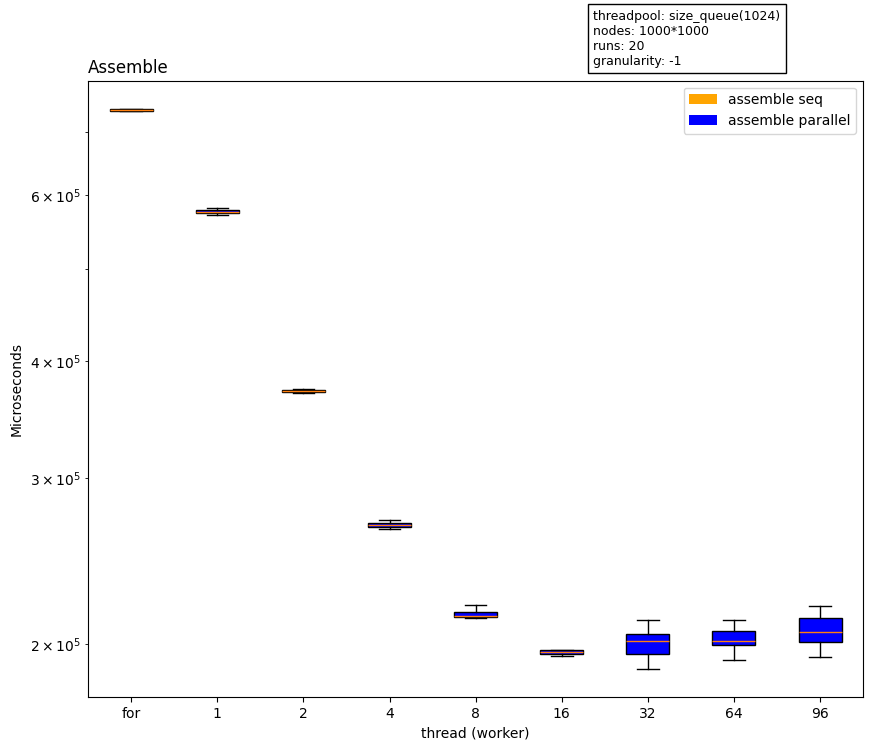

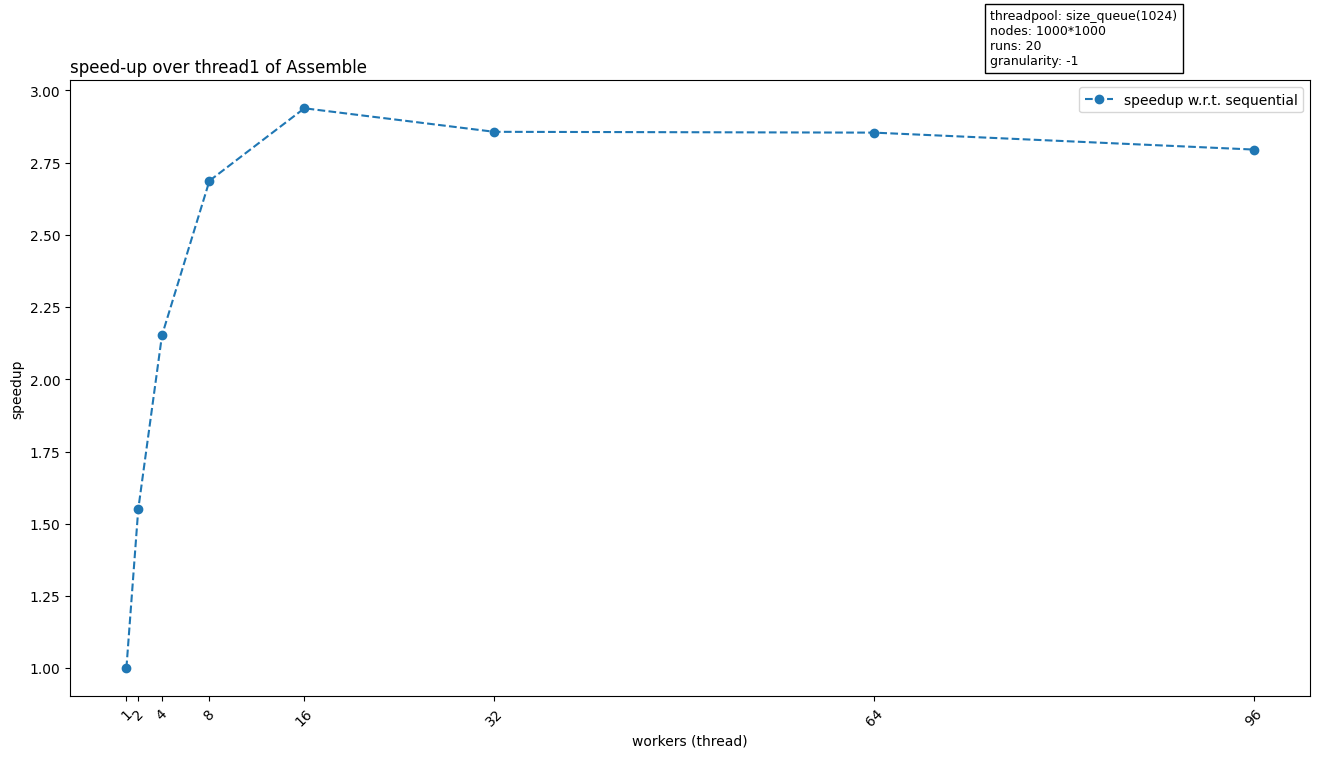

In [28]:
nodi = 1000 #500 250
plot_boxplot(assemble_nodi_1000_seq, assemble_nodi_1000_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_1000_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
for: 181467.00
1: 146280.00
2: 93354.00
4: 66237.50
8: 53225.00
16: 54928.50
32: 53303.50
64: 55814.50
96: 60513.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.57
4 threads -> speedup: 2.21
8 threads -> speedup: 2.75
16 threads -> speedup: 2.66
32 threads -> speedup: 2.74
64 threads -> speedup: 2.62
96 threads -> speedup: 2.42


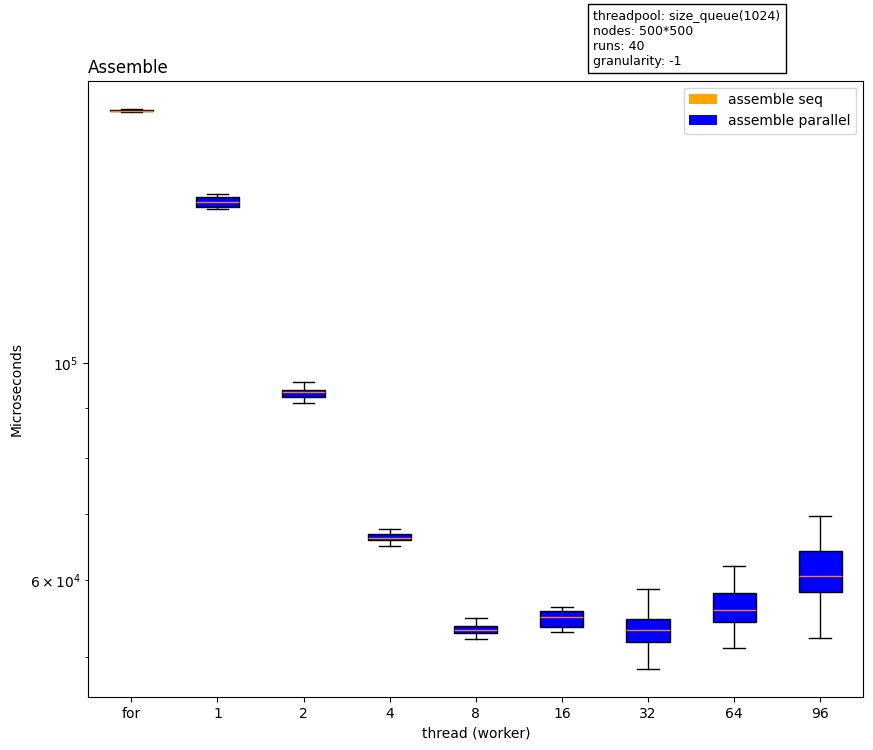

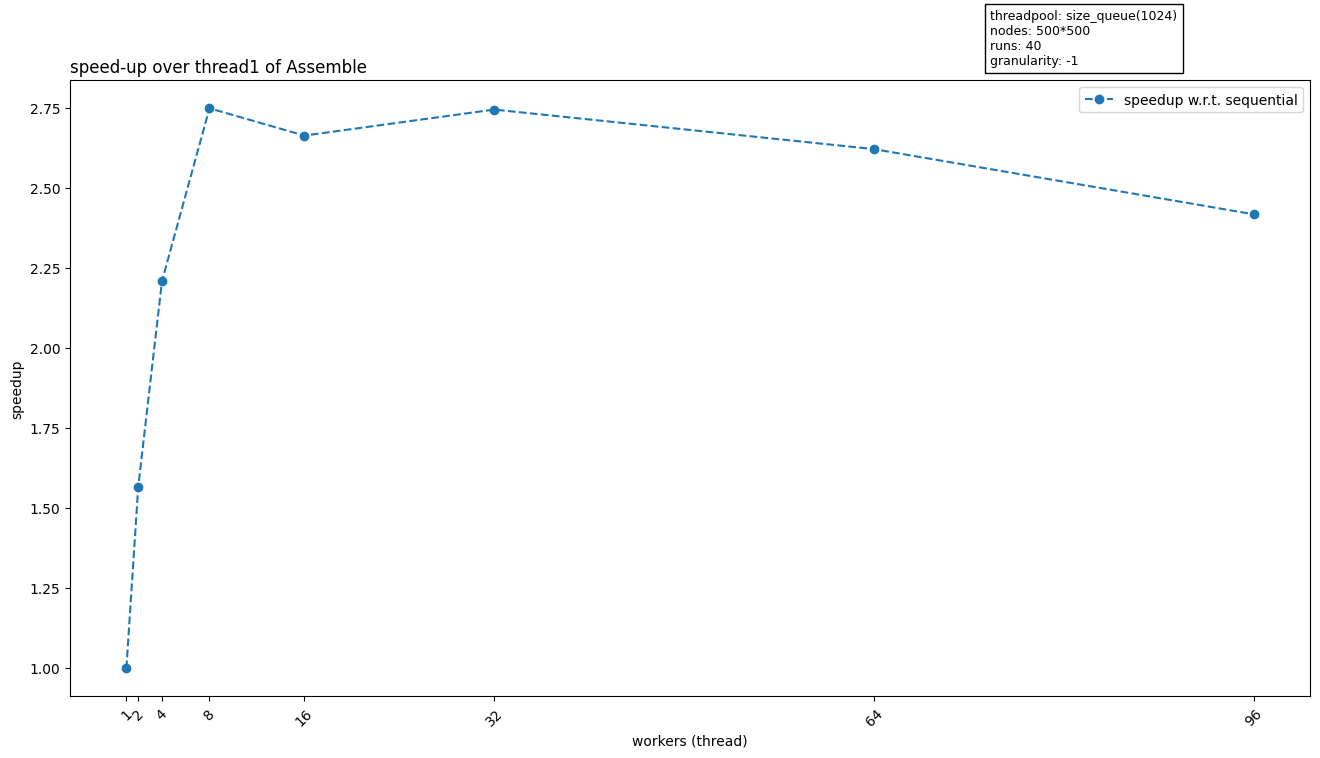

In [12]:
nodi = 500
plot_boxplot(assemble_nodi_500_seq, assemble_nodi_500_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_500_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
for: 43001.00
1: 33707.00
2: 21097.50
4: 15516.50
8: 12132.00
16: 11750.50
32: 16532.50
64: 21669.50
96: 22087.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.60
4 threads -> speedup: 2.17
8 threads -> speedup: 2.78
16 threads -> speedup: 2.87
32 threads -> speedup: 2.04
64 threads -> speedup: 1.56
96 threads -> speedup: 1.53


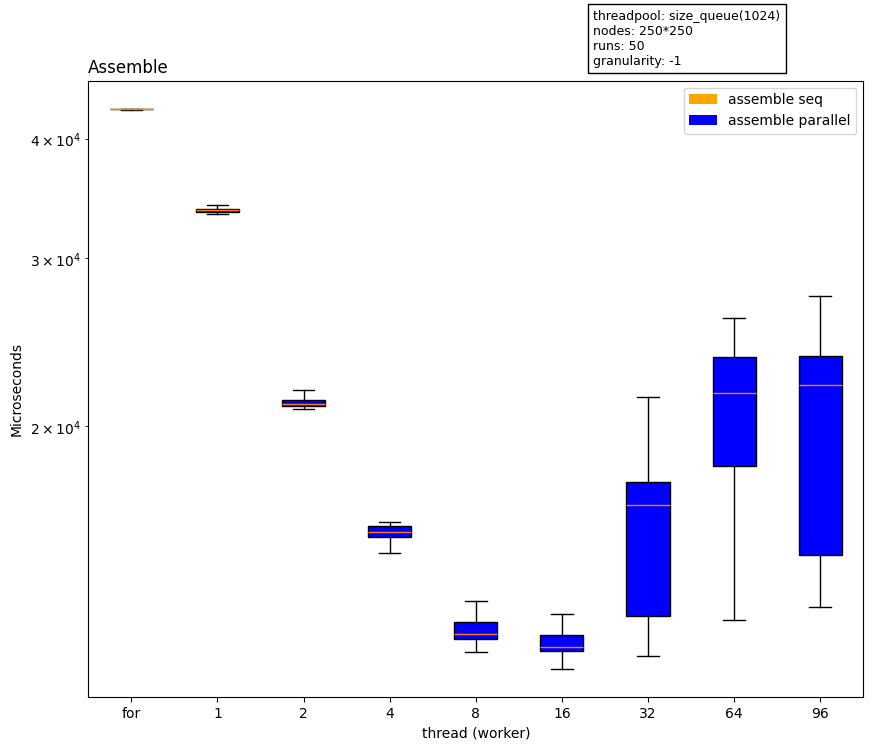

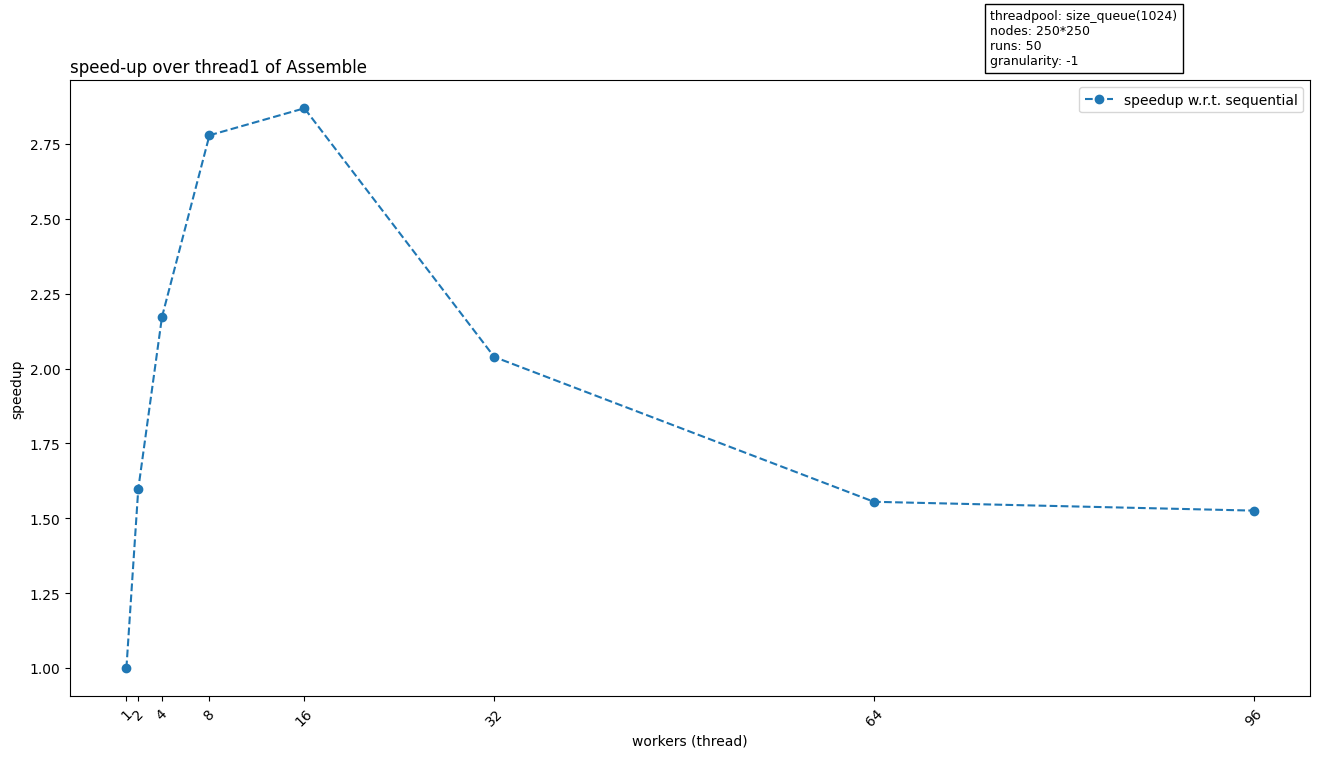

In [13]:
nodi = 250
plot_boxplot(assemble_nodi_250_seq, assemble_nodi_250_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_250_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)

## Calcolo triple 


In [36]:
# THREAD 1
calcolo_triple_nodi_250_thread_1 = [25646,25310,25200,25404,25293,25384,25190,25360,25391,25489,25262,25207,25591,25460,25261,25310,25632,25294,25200,25500,25478,25304,25369,25519,25394,25327,25393,25612,25241,25216,25514,25242,25339,25588,25295,25216,25452,25582,25214,25427,25434,25218,25438,25508,25539,25262,25267,25528,25285,25248]
calcolo_triple_nodi_500_thread_1 = [102119,102263,102273,102537,102230,102514,102513,102557,102221,102507,102511,102296,101981,102735,102539,102704,102544,102233,102436,102675,102209,102477,102618,102420,102557,102804,102374,102652,102182,102268,102266,102388,102235,102290,102311,102129,102406,102796,102367,102221]
calcolo_triple_nodi_1000_thread_1 = [406610,409145,406688,408536,408230,406195,408519,406648,408498,406382,406086,408840,408690,406175,406637,409035,406657,407966,406577,409148]

# THREAD 2
calcolo_triple_nodi_250_thread_2 = [13697,13951,13040,12885,12814,13324,12660,12792,12873,12869,12639,12666,13006,12722,13602,12862,13697,12762,13677,12657,13702,12654,13154,12633,12683,12819,12786,13529,12724,13595,12666,13701,12809,13493,12794,13722,12680,13687,12640,13657,13645,13764,13060,13587,12712,12999,12675,12651,12647,12670]
calcolo_triple_nodi_500_thread_2 = [52834,51402,51607,51731,54867,51598,51761,51366,51763,51722,51490,52125,51071,51687,54575,51740,51567,52140,51436,51700,51870,53218,51435,51608,52104,51828,54584,51046,51602,51307,54883,52401,51214,52348,55222,51851,51692,51160,54775,51977]
calcolo_triple_nodi_1000_thread_2 = [205151,203854,205519,216017,205031,210295,203805,217550,204064,204205,205013,215785,204151,205086,205247,217298,204058,204336,204197,205152]

# THREAD SEQUENZIALE
calcolo_triple_nodi_250_thread_seq = [39774,36408,36435,36149,36231,36157,36195,36441,36330,36148,36144,36177,36183,36397,36367,36167,36161,36173,36165,36385,36371,36153,36178,36178,36143,36395,36341,36147,36185,36211,36199,36367,36349,36159,36214,36130,36134,36368,36345,36159,36144,36168,36133,36363,36338,36148,36182,36166,36154,36696]
calcolo_triple_nodi_500_thread_seq = [151903,150467,150461,150413,150537,150382,150604,150388,150404,150357,150449,150387,150414,150687,150466,150459,150420,150504,150430,150715,150379,150399,150515,150581,150266,150524,150308,150374,150478,150481,150345,150531,150392,150482,150296,150678,150387,150509,150445,150327]
calcolo_triple_nodi_1000_thread_seq = [607230,603739,603426,603882,603598,606697,606862,603382,603762,603320,603842,606706,606724,603316,603515,603650,603464,606663,606529,603056]

# THREAD 4
calcolo_triple_nodi_250_thread_4 = [7218,6925,6437,6986,6656,6648,6747,7453,6586,7181,7039,6752,6378,6698,6386,6523,6589,7086,7078,6684,6519,6390,7196,6505,6570,6386,6869,6655,6939,7019,6573,6703,6526,6737,6838,6515,6496,6512,6662,6366,6508,6747,7008,6523,6594,6395,6689,6498,6638,6547]
calcolo_triple_nodi_500_thread_4 = [26624,26059,26163,26419,26395,27186,26575,26632,26777,26948,26347,26805,26215,26485,26315,27520,26350,26465,27154,26172,26926,26311,26387,26184,26724,27045,26653,27063,26242,26692,26490,27304,26676,26339,27015,26755,26966,26241,26735,26720]
calcolo_triple_nodi_1000_thread_4 = [105103,104518,104512,104487,106901,104285,102958,103359,104511,104285,105275,104357,106571,105552,105207,106789,102445,104458,102860,105222]

# THREAD 8
calcolo_triple_nodi_250_thread_8 = [3870,3502,3478,3925,3623,3552,3412,3544,3749,3496,3660,3948,3619,3588,3535,4174,3551,3485,3526,3432,3747,3569,3472,3517,3664,3640,3553,3727,3618,3455,3515,3445,3602,3717,3478,3652,3565,3641,3563,3732,3835,3621,3776,3431,3515,3680,3612,3476,3608,3707]
calcolo_triple_nodi_500_thread_8 = [14467,14664,13531,13802,14185,13608,13712,13749,13567,13902,13793,13344,13640,13250,13712,13593,14018,13900,14050,13572,13824,13661,13604,13756,14306,13625,13990,14162,13763,13569,14362,13442,13796,13528,14067,13855,13606,13739,13708,13209]
calcolo_triple_nodi_1000_thread_8 = [52715,52461,53420,53778,52214,53200,53421,52811,53106,52194,51681,52780,58487,52117,60190,53096,53493,80951,53203,52179]

# THREAD 16
calcolo_triple_nodi_250_thread_16 = [3629,3403,2911,3429,3641,3421,3354,3849,3552,3506,3361,3738,3676,3393,3579,3736,3466,3655,3795,3404,4057,3422,3554,3393,3769,3404,3780,3418,3799,3406,3367,3373,3799,3403,3541,3368,3969,3407,4002,3489,3960,3508,3570,3391,3332,3395,3802,3398,3411,2082]
calcolo_triple_nodi_500_thread_16 = [13230,13741,13360,13522,13368,13640,13273,14008,13657,13351,13593,13487,13492,13450,13421,13587,13401,13550,13340,13504,13566,13486,13386,13831,7049,13538,13670,13383,13548,13930,13511,13340,13352,13362,13339,13878,13487,13727,13544,13305]
calcolo_triple_nodi_1000_thread_16 = [27405,53321,53140,53378,44890,53324,27578,28349,28140,29979,27858,53227,53468,26775,52895,27938,53070,53259,45495,27062]

# THREAD 32
calcolo_triple_nodi_250_thread_32 = [5093,3631,3317,3893,3962,3758,4566,3827,4095,4472,3618,2779,3791,3188,3250,3009,3759,3644,3252,4157,4844,3474,3811,4592,3779,4131,2739,4889,3814,3901,4157,3585,3105,3614,5976,3553,3482,4410,4388,4252,3585,2717,2449,3677,4073,3814,3171,5033,3058,5238]
calcolo_triple_nodi_500_thread_32 = [14180,9189,8080,13585,10504,12826,8838,9621,9856,11713,8578,13057,8936,14213,9775,12597,8151,10754,8779,11600,14260,13572,12816,8693,13045,10165,9000,8177,9955,10314,12654,9381,8325,12849,11142,10342,14040,10720,8939,11069]
calcolo_triple_nodi_1000_thread_32 = [28409,40814,40870,40348,39746,40984,32359,36370,41031,28364,40496,29247,41124,35311,29179,30611,36628,40781,27926,39232]

# THREAD 64
calcolo_triple_nodi_250_thread_64 = [7183,5687,5076,4691,5065,6588,3919,4959,5795,4268,2897,3978,4712,4448,6784,4835,4356,4512,5688,5051,4120,4722,3715,5972,5570,5139,6042,4286,3648,2686,4069,3867,4151,4328,4191,5298,6432,6302,5738,4525,6704,4496,5437,3670,4910,2899,4455,6841,4994,5980]
calcolo_triple_nodi_500_thread_64 = [15935,15273,14925,24221,17602,13403,10748,11720,14799,9359,17133,12482,11088,13747,10237,12702,12485,11064,24401,13676,16292,10485,12509,12032,17363,14696,11881,10441,13155,10141,14269,16538,12150,12061,15128,13515,16345,10417,13158,14571]
calcolo_triple_nodi_1000_thread_64 = [29071,39055,37166,38663,37582,34044,38662,30126,44475,28485,33925,38809,39175,34273,30309,32481,42721,31390,33676,30900]

# THREAD 96
calcolo_triple_nodi_250_thread_96 = [6451,5458,4417,5195,4920,4772,5389,5090,4240,7170,4110,4146,6190,5478,6548,4235,5530,3993,6767,4938,6177,4488,6048,5869,3794,6488,4733,4637,4047,8565,5969,6313,4458,3957,4953,9017,5100,6280,4607,6428,4534,3605,5825,3818,4280,3842,4679,5611,4349,7190]
calcolo_triple_nodi_500_thread_96 = [14456,17637,22136,12989,14331,16862,15643,17956,16246,17491,14875,14183,16792,19688,24605,17844,15442,19579,17119,14046,16747,21562,14225,14527,14803,18040,19664,13969,16258,13288,16614,16356,15122,16249,13288,19813,14458,19047,15846,21212]
calcolo_triple_nodi_1000_thread_96 = [32618,39816,34017,39957,44881,41603,33135,35585,38822,44814,30070,34589,39526,37835,41229,38724,41851,39485,30532,45964]


In [37]:
# NODI 250
calcolo_triple_nodi_250_multi = [
    calcolo_triple_nodi_250_thread_1,
    calcolo_triple_nodi_250_thread_2,
    calcolo_triple_nodi_250_thread_4,
    calcolo_triple_nodi_250_thread_8,
    calcolo_triple_nodi_250_thread_16,
    calcolo_triple_nodi_250_thread_32,
    calcolo_triple_nodi_250_thread_64,
    calcolo_triple_nodi_250_thread_96
]

# NODI 500
calcolo_triple_nodi_500_multi = [
    calcolo_triple_nodi_500_thread_1,
    calcolo_triple_nodi_500_thread_2,
    calcolo_triple_nodi_500_thread_4,
    calcolo_triple_nodi_500_thread_8,
    calcolo_triple_nodi_500_thread_16,
    calcolo_triple_nodi_500_thread_32,
    calcolo_triple_nodi_500_thread_64,
    calcolo_triple_nodi_500_thread_96
]

# NODI 1000
calcolo_triple_nodi_1000_multi = [
    calcolo_triple_nodi_1000_thread_1,
    calcolo_triple_nodi_1000_thread_2,
    calcolo_triple_nodi_1000_thread_4,
    calcolo_triple_nodi_1000_thread_8,
    calcolo_triple_nodi_1000_thread_16,
    calcolo_triple_nodi_1000_thread_32,
    calcolo_triple_nodi_1000_thread_64,
    calcolo_triple_nodi_1000_thread_96
]



=== Median values (µs) ===
for: 603750.50
1: 407327.00
2: 205058.50
4: 104511.50
8: 53101.00
16: 45192.50
32: 37930.00
64: 34158.50
96: 39153.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.99
4 threads -> speedup: 3.90
8 threads -> speedup: 7.67
16 threads -> speedup: 9.01
32 threads -> speedup: 10.74
64 threads -> speedup: 11.92
96 threads -> speedup: 10.40


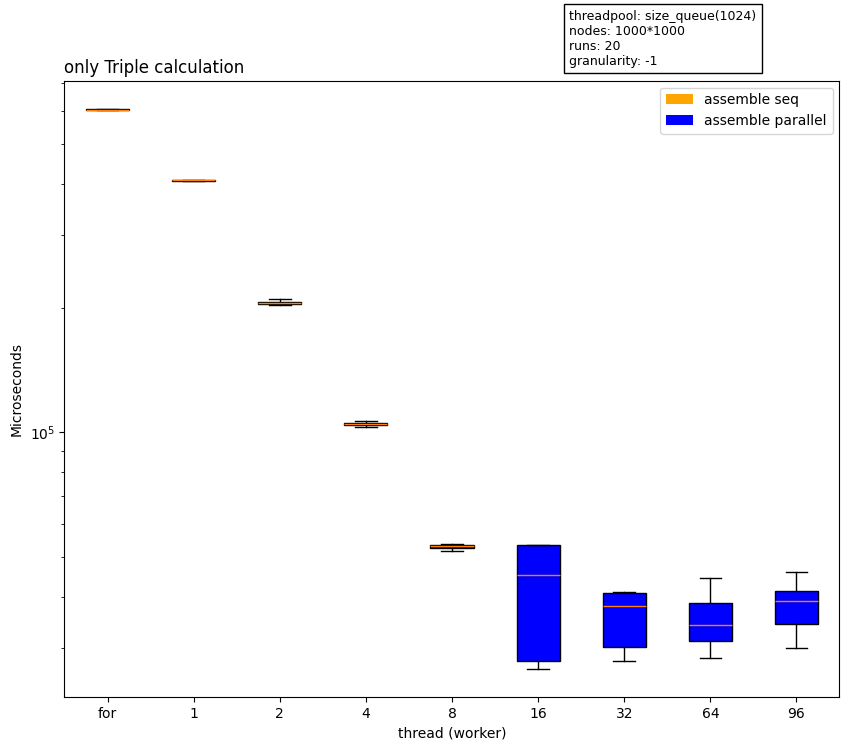

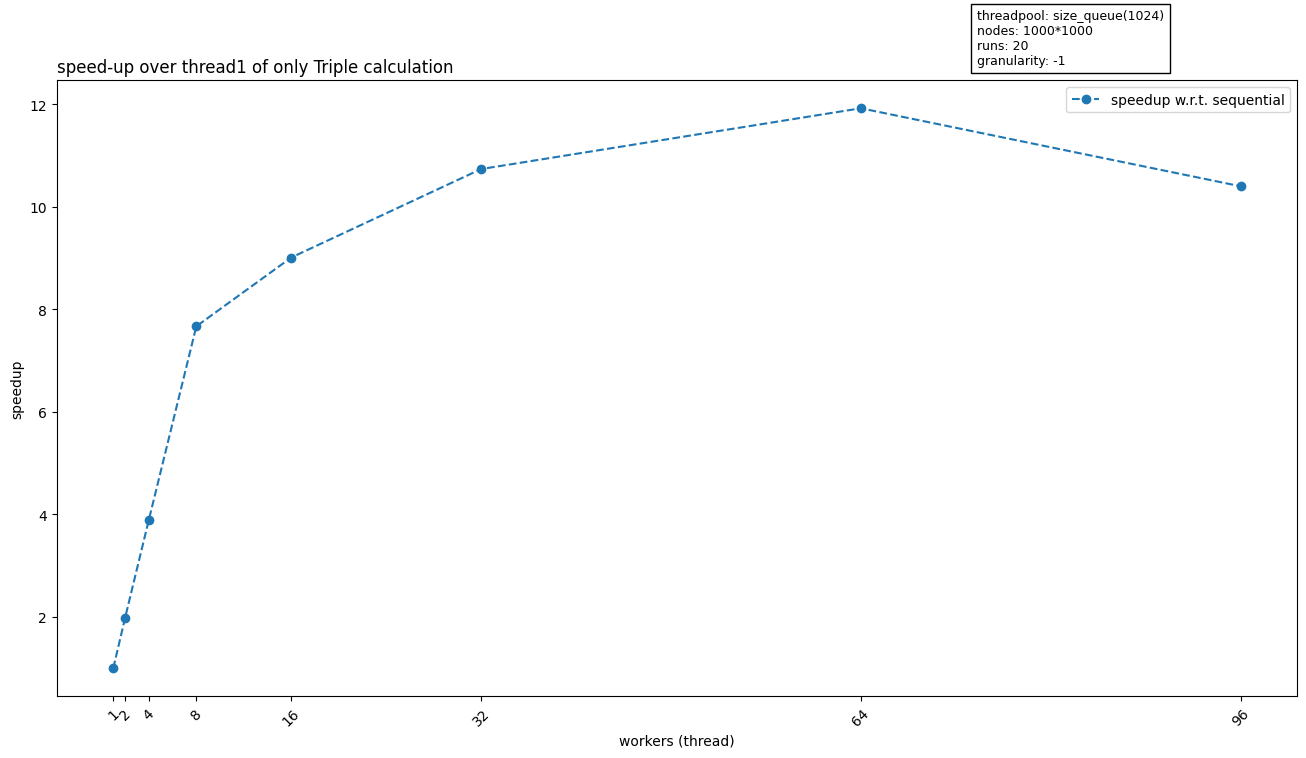

In [38]:
nodi = 1000 #500 250
plot_boxplot(calcolo_triple_nodi_1000_thread_seq, calcolo_triple_nodi_1000_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_1000_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
for: 150447.00
1: 102397.00
2: 51735.50
4: 26628.00
8: 13744.00
16: 13489.50
32: 10423.00
64: 13280.50
96: 60513.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.98
4 threads -> speedup: 3.85
8 threads -> speedup: 7.45
16 threads -> speedup: 7.59
32 threads -> speedup: 9.82
64 threads -> speedup: 7.71
96 threads -> speedup: 1.69


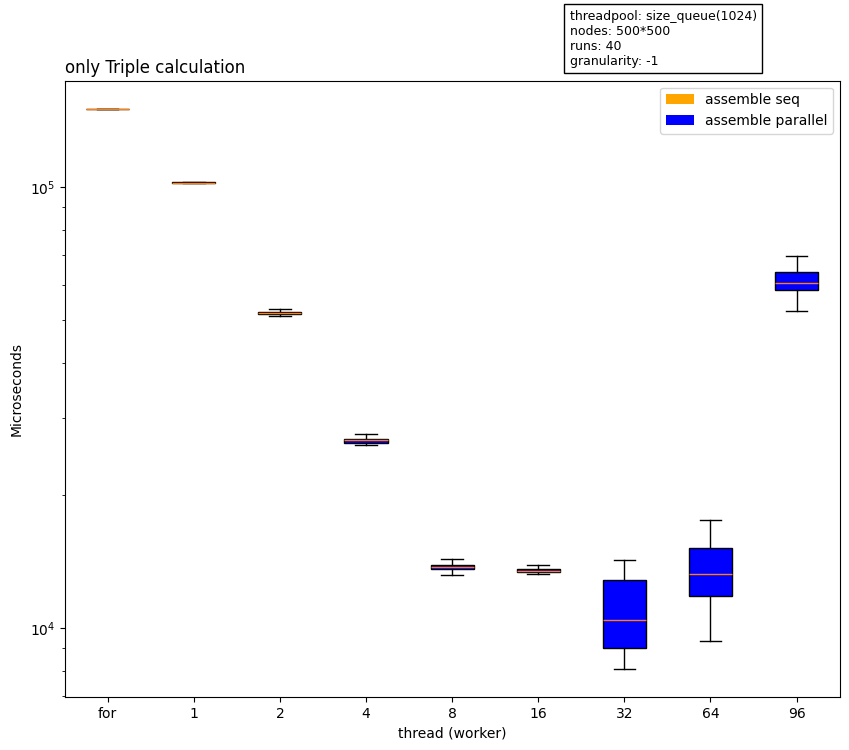

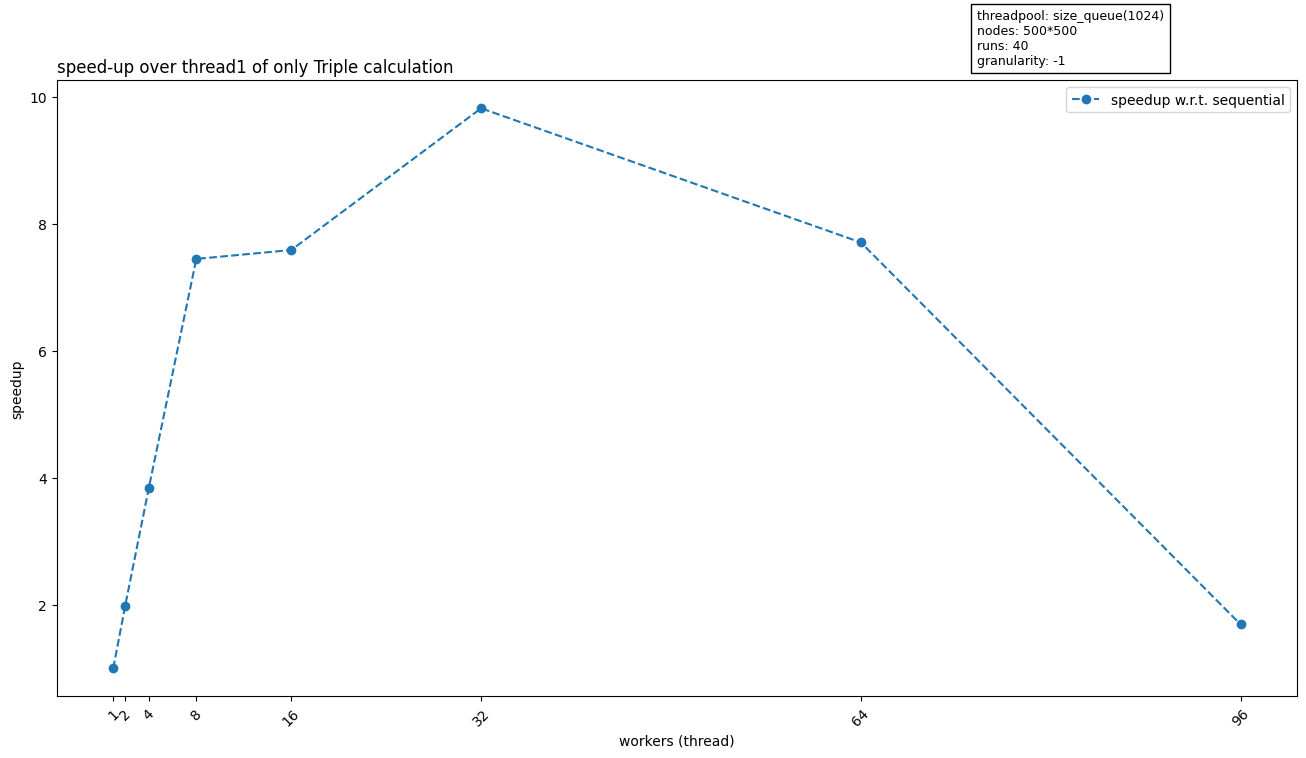

In [17]:
nodi = 500 
plot_boxplot(calcolo_triple_nodi_500_thread_seq, calcolo_triple_nodi_500_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_500_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
for: 36182.50
1: 25364.50
2: 12865.50
4: 6651.50
8: 3595.00
16: 3477.50
32: 3785.00
64: 4778.50
96: 22087.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.97
4 threads -> speedup: 3.81
8 threads -> speedup: 7.06
16 threads -> speedup: 7.29
32 threads -> speedup: 6.70
64 threads -> speedup: 5.31
96 threads -> speedup: 1.15


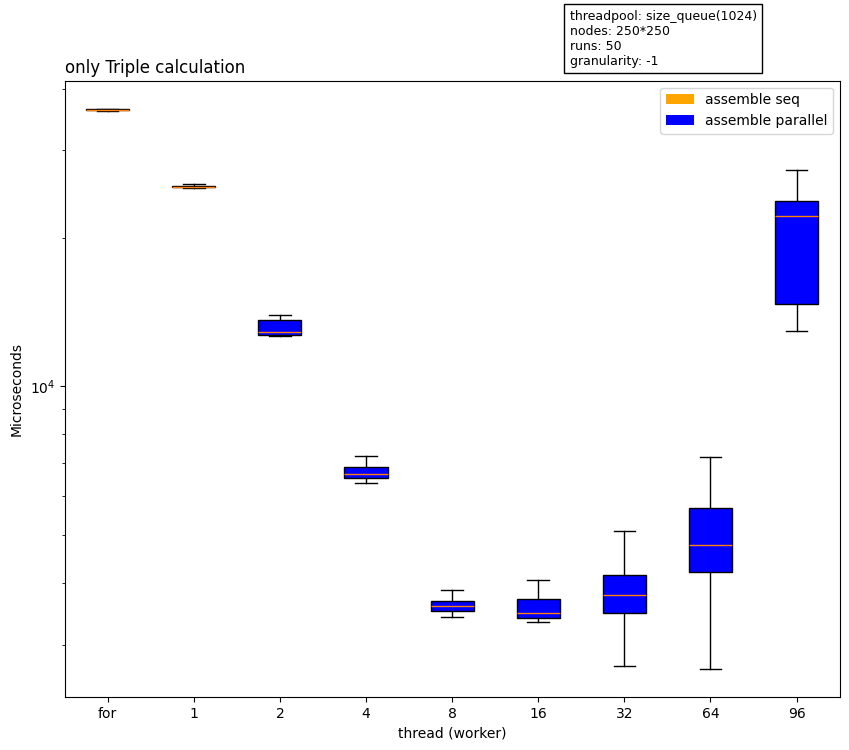

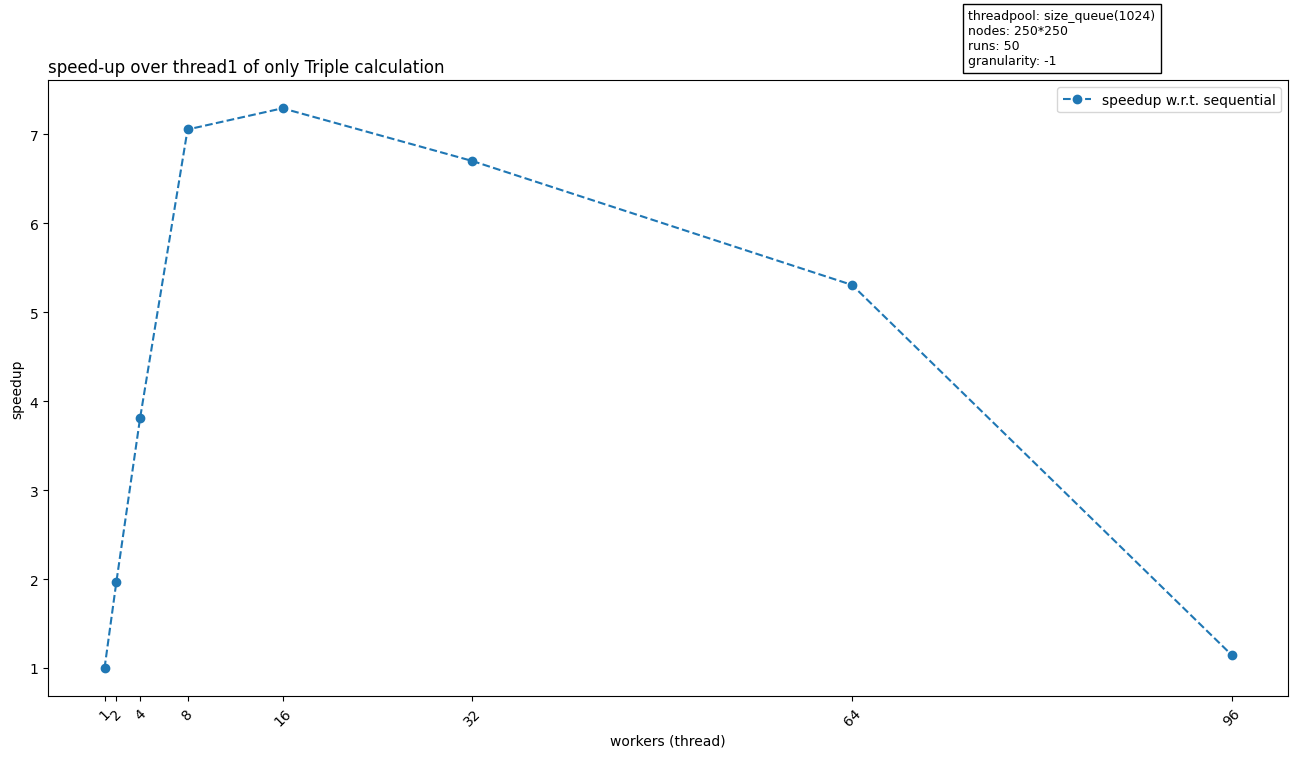

In [18]:
nodi = 250
plot_boxplot(calcolo_triple_nodi_250_thread_seq, calcolo_triple_nodi_250_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_250_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)

## adamal low

In [32]:
# Mediane per nodi 250
median_calcolo_250_seq = np.median(calcolo_triple_nodi_250_thread_seq)
median_calcolo_250_th1 = np.median(calcolo_triple_nodi_250_thread_1)
median_calcolo_250_th2 = np.median(calcolo_triple_nodi_250_thread_2)
median_calcolo_250_th4 = np.median(calcolo_triple_nodi_250_thread_4)
median_calcolo_250_th8 = np.median(calcolo_triple_nodi_250_thread_8)
median_calcolo_250_th16 = np.median(calcolo_triple_nodi_250_thread_16)

# Mediane per nodi 500
median_calcolo_500_seq = np.median(calcolo_triple_nodi_500_thread_seq)
median_calcolo_500_th1 = np.median(calcolo_triple_nodi_500_thread_1)
median_calcolo_500_th2 = np.median(calcolo_triple_nodi_500_thread_2)
median_calcolo_500_th4 = np.median(calcolo_triple_nodi_500_thread_4)
median_calcolo_500_th8 = np.median(calcolo_triple_nodi_500_thread_8)
median_calcolo_500_th16 = np.median(calcolo_triple_nodi_500_thread_16)

# Mediane per nodi 1000
median_calcolo_1000_seq = np.median(calcolo_triple_nodi_1000_thread_seq)
median_calcolo_1000_th1 = np.median(calcolo_triple_nodi_1000_thread_1)
median_calcolo_1000_th2 = np.median(calcolo_triple_nodi_1000_thread_2)
median_calcolo_1000_th4 = np.median(calcolo_triple_nodi_1000_thread_4)
median_calcolo_1000_th8 = np.median(calcolo_triple_nodi_1000_thread_8)
median_calcolo_1000_th16 = np.median(calcolo_triple_nodi_1000_thread_16)


# Mediane per nodi 250
median_assemble_250_seq = np.median(assemble_nodi_250_seq)
median_assemble_250_th1 = np.median(assemble_nodi_250_thread_1)
median_assemble_250_th2 = np.median(assemble_nodi_250_thread_2)
median_assemble_250_th4 = np.median(assemble_nodi_250_thread_4)
median_assemble_250_th8 = np.median(assemble_nodi_250_thread_8)
median_assemble_250_th16 = np.median(assemble_nodi_250_thread_16)

# Mediane per nodi 500
median_assemble_500_seq = np.median(assemble_nodi_500_seq)
median_assemble_500_th1 = np.median(assemble_nodi_500_thread_1)
median_assemble_500_th2 = np.median(assemble_nodi_500_thread_2)
median_assemble_500_th4 = np.median(assemble_nodi_500_thread_4)
median_assemble_500_th8 = np.median(assemble_nodi_500_thread_8)
median_assemble_500_th16 = np.median(assemble_nodi_500_thread_16)

# Mediane per nodi 1000
median_assemble_1000_seq = np.median(assemble_nodi_1000_seq)
median_assemble_1000_th1 = np.median(assemble_nodi_1000_thread_1)
median_assemble_1000_th2 = np.median(assemble_nodi_1000_thread_2)
median_assemble_1000_th4 = np.median(assemble_nodi_1000_thread_4)
median_assemble_1000_th8 = np.median(assemble_nodi_1000_thread_8)
median_assemble_1000_th16 = np.median(assemble_nodi_1000_thread_16)




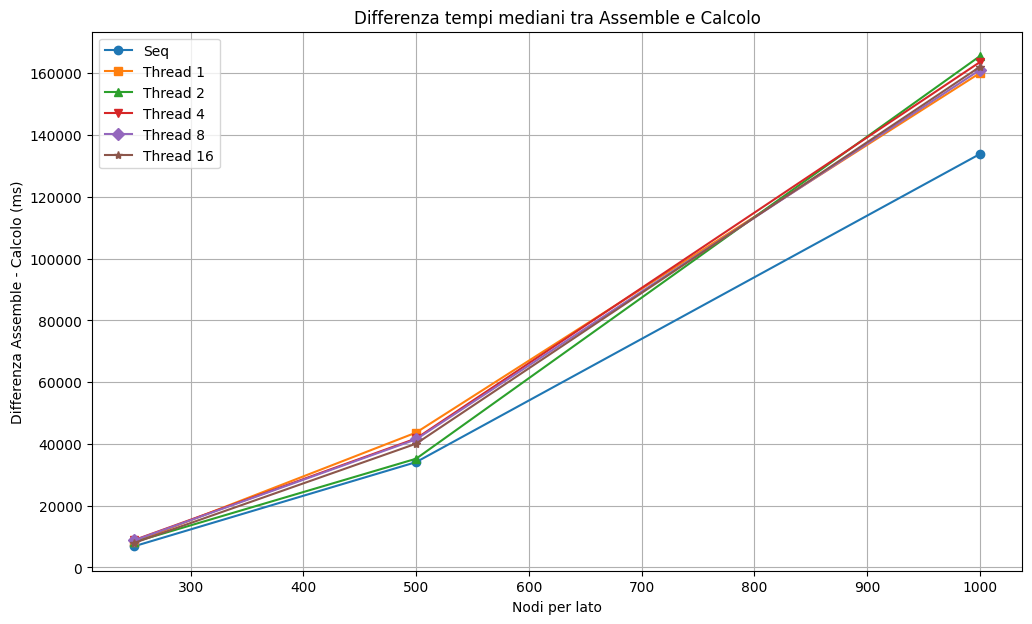

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Median values for Assemble
assemble_seq = [median_assemble_250_seq, median_assemble_500_seq, median_assemble_1000_seq]
assemble_th1 = [median_assemble_250_th1, median_assemble_500_th1, median_assemble_1000_th1]
assemble_th2 = [median_assemble_250_th2, median_assemble_500_th2, median_assemble_1000_th2]
assemble_th4 = [median_assemble_250_th4, median_assemble_500_th4, median_assemble_1000_th4]
assemble_th8 = [median_assemble_250_th8, median_assemble_500_th8, median_assemble_1000_th8]
assemble_th16 = [median_assemble_250_th16, median_assemble_500_th16, median_assemble_1000_th16]

# Median values for Calcolo
calcolo_seq = [median_calcolo_250_seq, median_calcolo_500_seq, median_calcolo_1000_seq]
calcolo_th1 = [median_calcolo_250_th1, median_calcolo_500_th1, median_calcolo_1000_th1]
calcolo_th2 = [median_calcolo_250_th2, median_calcolo_500_th2, median_calcolo_1000_th2]
calcolo_th4 = [median_calcolo_250_th4, median_calcolo_500_th4, median_calcolo_1000_th4]
calcolo_th8 = [median_calcolo_250_th8, median_calcolo_500_th8, median_calcolo_1000_th8]
calcolo_th16 = [median_calcolo_250_th16, median_calcolo_500_th16, median_calcolo_1000_th16]

# Calcolo differenze
diff_seq = np.array(assemble_seq) - np.array(calcolo_seq)
diff_th1 = np.array(assemble_th1) - np.array(calcolo_th1)
diff_th2 = np.array(assemble_th2) - np.array(calcolo_th2)
diff_th4 = np.array(assemble_th4) - np.array(calcolo_th4)
diff_th8 = np.array(assemble_th8) - np.array(calcolo_th8)
diff_th16 = np.array(assemble_th16) - np.array(calcolo_th16)

# Nodi per lato (asse x)
nodi = [250, 500, 1000]

# Plot
plt.figure(figsize=(12,7))
plt.plot(nodi, diff_seq, marker='o', label='Seq')
plt.plot(nodi, diff_th1, marker='s', label='Thread 1')
plt.plot(nodi, diff_th2, marker='^', label='Thread 2')
plt.plot(nodi, diff_th4, marker='v', label='Thread 4')
plt.plot(nodi, diff_th8, marker='D', label='Thread 8')
plt.plot(nodi, diff_th16, marker='*', label='Thread 16')
plt.xlabel("Nodi per lato")
plt.ylabel("Differenza Assemble - Calcolo (ms)")
plt.title("Differenza tempi mediani tra Assemble e Calcolo")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
for i in range(3):
    print(calcolo_seq[i]/assemble_seq[i])

0.8494323469197841
0.8250602656818998
0.8283148834643851


In [35]:
for i in range(3):
    print(calcolo_th1[i]/assemble_th1[i])

0.7572094807993152
0.7020844843697777
0.7189758724150583


In [40]:
n = 2

speedup_max = []
for i in range(3):
    p = calcolo_th1[i]/assemble_th1[i]
    s = 1-p 
    speedup_max.append(1/(s+p/n))
print(speedup_max)


[np.float64(1.6092816682302364), np.float64(1.5409323456842028), np.float64(1.5612508437062087)]


## Effetto di granularity

In [56]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'iterazioni per job',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes : {nodi}x{nodi}\nruns: {len(data_par_for_n[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [63]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes: {nodi}x{nodi}\nruns:{len(data_list[1])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [ ]:
#parametri
nodi = 500 # tot_celle = (nodi-1)^2, granularity di partenza quindi tot_celle/n_thread
n_thread = 16
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = [62250,6000,600,60] # granularity

In [72]:
dati_seq = []
dati_seq =np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
for: 94632.00
62250: 53660.00
6000: 52081.00
600: 55985.00
60: 589855.00



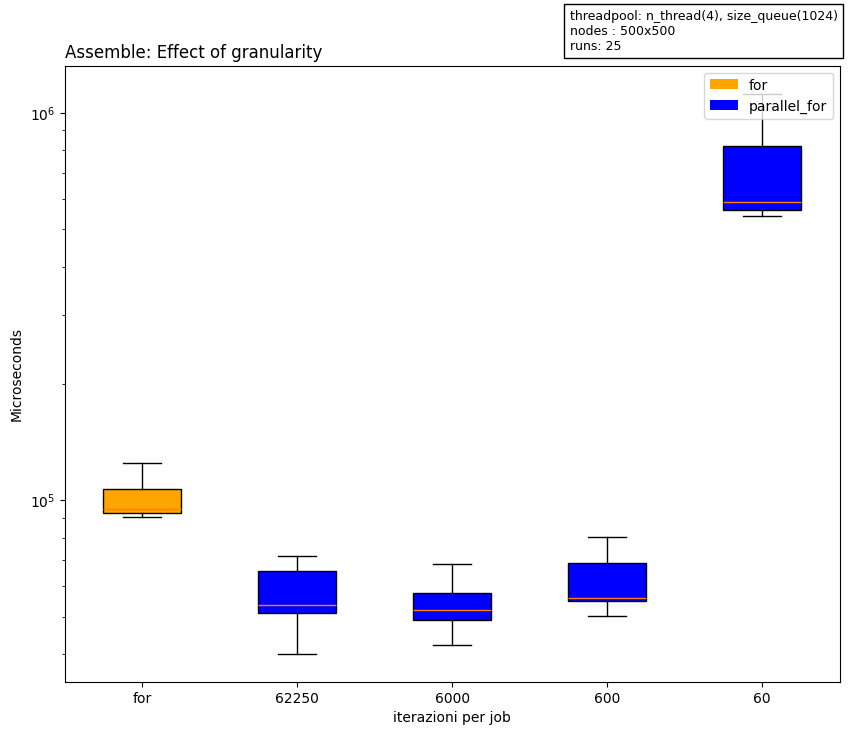

In [73]:
plot_granularity(dati_seq,dati_par,"Assemble: Effect of granularity")


=== Speedup values ===
Granularity 60: speedup = 0.16
Granularity 600: speedup = 1.69
Granularity 6000: speedup = 1.82
Granularity 62250: speedup = 1.76



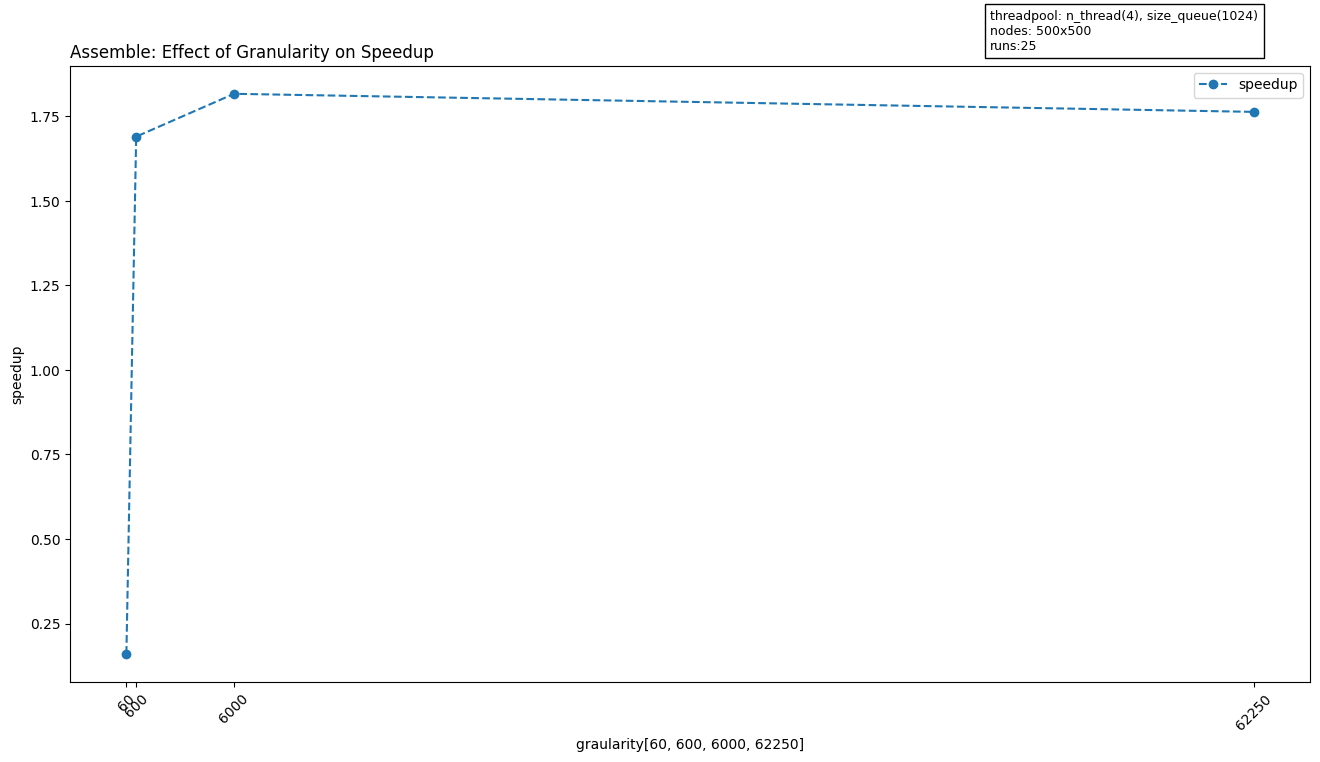

In [74]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Assemble: Effect of Granularity on Speedup",granularity)